## `lab08`—“The Secret Weapon that Won the War”

❖ Objectives

-   Understand basic concepts of remapping sets.
-   Build a transformation pipeline of simple elements.

In today's lab, we will explore some fundamentals of cryptography.  We will also look at using our language letter frequency tools from before to suggest possible ways to crack codes, and implement a simplified version of the World War II-era Nazi Enigma machine (most recently featured in the film *The Imitation Game* about Alan Turing).

### The Caesar Cipher, Revisited

In our lectures, you might have been introduced to the idea of a *Caesar cipher*, in which each letter of the alphabet is mapped forward to obscure a message.  Let's recreate that code and then extend it to use an arbitrary offset for the encoding.

![](./img/caesar-base.png)

As you recall, there was a straightforward way to implement such a cipher:

In [2]:
# Set up encoding dictionary
alphabet1 = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
alphabet2 = 'BCDEFGHIJKLMNOPQRSTUVWXYZA'
e={}
for i in range(len(alphabet1)):
    e[alphabet1[i]] = alphabet2[i]

# Set up message to be encoded
message = "HELLO"
message = message.upper()

# Encode message
encoded=''
for c in message:
    if c in alphabet1:
        encoded += e[c]
    else:
        encoded += c

print('%s encoded is %s'%(message, encoded))

HELLO encoded is IFMMP


-   Compose a function `encode_caesar` which implements the identical functionality:  it should accept a variable `message`, transform it according to the Caesar cipher above, and `return` a variable `encoded`.

In [3]:
# define your function here
def encode_caesar(message):
    # Set up the encoding dictionary
    ## YOU WRITE THIS BLOCK (USE THE ABOVE CODE IF YOU NEED HELP)
    alphabet1 = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    alphabet2 = 'BCDEFGHIJKLMNOPQRSTUVWXYZA'
    e={}
    for i in range(len(alphabet1)):
        e[alphabet1[i]] = alphabet2[i]
    
    # Encode the message (converted to upper case)
    ## YOU WRITE THIS BLOCK (USE THE ABOVE CODE IF YOU NEED HELP)
    
    message = message.upper()
    
    encoded=''
    for c in message:
        if c in alphabet1:
            encoded += e[c]
        else:
            encoded += c
    
    # Finally, return the encoded message.
    return encoded

In [4]:
# test your code here.  You may edit this cell, and you may use any sample text, but the following is provided for convenience.
text = """The Adventures of Sherlock Holmes, by Arthur Conan Doyle"""
encode_caesar(text)

'UIF BEWFOUVSFT PG TIFSMPDL IPMNFT, CZ BSUIVS DPOBO EPZMF'

In [5]:
# it should pass this test---do NOT edit this cell
test_text = """When I glance over my notes and records of the Sherlock Holmes cases between the years '82 and '90, I am faced by so many
which present strange and interesting features that it is no easy matter to know which to choose and which to leave."""
code_text = """XIFO J HMBODF PWFS NZ OPUFT BOE SFDPSET PG UIF TIFSMPDL IPMNFT DBTFT CFUXFFO UIF ZFBST '82 BOE '90, J BN GBDFE CZ TP NBOZ
XIJDI QSFTFOU TUSBOHF BOE JOUFSFTUJOH GFBUVSFT UIBU JU JT OP FBTZ NBUUFS UP LOPX XIJDI UP DIPPTF BOE XIJDI UP MFBWF."""
result_text = encode_caesar(test_text)
assert result_text == code_text
print('Success!')

Success!


This one-letter shift is easy enough to crack even in your head.  What if we generalized it to use an `offset` (between 0 and 25, where 0 yields the same result as the original message)?  Then we could encode and decode using the same function (by offsetting forward $n$ letters, and then offsetting forward $26-n$ letters).

First, to simplify all of our later work, let's `import` a key default variable for the alphabet:

In [6]:
from string import ascii_uppercase as alphabet
print(alphabet)

ABCDEFGHIJKLMNOPQRSTUVWXYZ


To generalize our process, we need to have a general way of moving $n$ characters forward in the alphabet (and wrapping around if we count too far).

We need two tools:
-   A way to convert a character to a number (the location in the alphabet):  `alphabet.index(letter)`
-   A way to wrap around if `index+offset` is greater than the length of the alphabet (26 letters, so index 25):  the modulus or remainder operator, `%`, is well-suited for this.

In [7]:
letter = 'A'  # letter to encode
offset = 5    # offset
index = alphabet.index(letter)

print(alphabet[index+offset])

F


In [8]:
letter = 'Y'  # letter to encode
offset = 5    # offset
index = alphabet.index(letter)

print(alphabet[(index+offset)%26])

D


-   Compose a function 'mapper' which accepts a single-character string letter and an offset and `returns` the letter index mapped forward by the offset.  The periodic nature of the alphabet should be accounted for—that is, `'Z'` offset by `2` should `return` `'B'`.  The default value of `offset` should be `1`.

In [9]:
# define your function here
def mapper(letter, offset=1):
    ## YOU WRITE THIS BLOCK (USE THE ABOVE CODE IF YOU NEED HELP)
    index = alphabet.index(letter)
    return alphabet[(index+offset)%26]
    #pass

In [10]:
# test your code here.  You may edit this cell, and you may use any sample text, but the following is provided for convenience.
letter = "Q"
n = 4
mapper(letter, n)

'U'

In [11]:
# it should pass this test---do NOT edit this cell
assert mapper('A') == 'B'
assert mapper('A', 24) == 'Y'
print('Success!')

Success!


With `mapper`, it is straightforward to write a general function to apply a Caesar cipher across any number of letters.

You may accomplish this one of two ways:
-   Use `mapper` directly on each letter.  (This is more efficient for short messages.)
-   Use `mapper` to prepare a dictionary mapping each alphabet letter, and then use the `dict` to map letters in the message as it is encoded.  (This is more efficient for longer messages. Think why?)

In the next exercise you are going to implement both methods:

-   Compose the two versions of the function `caesar_cipher` which accepts a string `message` and an integer `offset`.  It should `return` `message` with each letter mapped by `offset` to another letter in the alphabet.  `offset` should default to `1` in the case that the user does not supply it.

In [12]:
# define your function here
def caesar_cipher(message, offset=1):
    # Set up the encoding dictionary if desired (or use mapper directly below)
    ## YOU WRITE THIS BLOCK (USE THE ABOVE CODE IF YOU NEED HELP)
    
    encoded = ''
    message = message.upper()
    # Encode the message (converted to upper case)
    ## YOU WRITE THIS BLOCK (USE THE ABOVE CODE IF YOU NEED HELP)
    for c in message:
        if c in alphabet:
            encoded += mapper(c, offset)
        else:
            encoded += c
    
    # Finally, return the encoded message.
    return encoded

In [13]:
# define your function here
def caesar_cipher(message, offset=1):
    # Set up the encoding dictionary if desired (or use mapper directly below)
    ## YOU WRITE THIS BLOCK (USE THE ABOVE CODE IF YOU NEED HELP)
    e={}
    for c in alphabet:
        e[c] = mapper(c, offset)
        
    encoded = ''
    message = message.upper()
    # Encode the message (converted to upper case)
    ## YOU WRITE THIS BLOCK (USE THE ABOVE CODE IF YOU NEED HELP)
    for c in message:
        if c in alphabet:
            encoded += e[c]
        else:
            encoded += c
    
    # Finally, return the encoded message.
    return encoded

In [14]:
# test your code here.  You may edit this cell, and you may use any sample text, but the following is provided for convenience.
text = """The Sign of Fear, by Arthur Conan Doyle"""
caesar_cipher(text)

'UIF TJHO PG GFBS, CZ BSUIVS DPOBO EPZMF'

In [15]:
# it should pass this test---do NOT edit this cell
# test case with specified offset
test_text = """A man should keep his little brain-attic stocked with all the furniture that he is likely to use, and the
rest he can put away in the lumber-room of his library, where he can get it if he wants it."""
code_text = """F RFS XMTZQI PJJU MNX QNYYQJ GWFNS-FYYNH XYTHPJI BNYM FQQ YMJ KZWSNYZWJ YMFY MJ NX QNPJQD YT ZXJ, FSI YMJ
WJXY MJ HFS UZY FBFD NS YMJ QZRGJW-WTTR TK MNX QNGWFWD, BMJWJ MJ HFS LJY NY NK MJ BFSYX NY."""
result_text = caesar_cipher(test_text, 5)
assert result_text == code_text
print('Success!')

Success!


In [16]:
# it should pass this test---do NOT edit this cell
# test default case
test_text = """You know my methods, Watson."""
code_text = """ZPV LOPX NZ NFUIPET, XBUTPO."""
result_text = caesar_cipher(test_text)
assert result_text == code_text
print('Success!')

Success!


`rot13` is [a common encoding used online](https://en.wikipedia.org/wiki/ROT13) to simply hide the answers to questions—the digital equivalent of printing the answer upside down in the corner.  `rot13` simply rotates the alphabet thirteen characters over—a Caesar cipher of half the alphabet's length.

You can easily write a code to `rot13` a text now:

In [17]:
def rot13(message):
    return caesar_cipher(message, offset=13)

Conveniently, a `rot13`-ed message is its own inverse:

In [18]:
message = "elementary"
print(message)
print(rot13(message))
print(rot13(rot13(message)))

elementary
RYRZRAGNEL
ELEMENTARY


### Code Cracking

The Caesar cipher is particularly weak, and only worked in an ancient world with low literacy and no prior cryptographic experience.  If you analyze the frequency of the letters, for instance, and guess that the most frequent letter in a long encoded text corresponds to E, the second most frequent to A, etc., then you can soon break Caesar ciphers even if you do not know the offset ahead of time.

We'll use our functions from last week, `lab07`, to aid in this.  Recall the function `calc_freq`, which returned a `dict` containing the relative frequency of letters in a sample of text.

In [19]:
# define your function here
from string import whitespace, punctuation, digits
from string import ascii_uppercase as alphabet

def calc_freq(text):
    # Create an empty frequency dictionary letter_freq.
    letter_freq = {}
    
    # Make text upper-case.
    text = text.upper()
    
    # Loop over each letter of the alphabet:
    for letter in alphabet:
        letter_freq[letter] = text.count(letter)
    
    # Make a copy of text without non-alphabet characters.
    from string import whitespace, punctuation, digits
    for character in whitespace+punctuation+digits:
        text = text.replace(character, '')
    
    # Normalize the frequencies and put the results back into letter_freq.
    for key in letter_freq.keys():
        letter_freq[key] = letter_freq[key] / len(text)
    
    # Finally, return the dict letter_freq.
    return letter_freq

Recall the default letter frequency of English-language text.  (The following code block will plot that for you; you need make no changes to it.)

In [20]:
# plotting boilerplate---you'll learn about this in class
import matplotlib as mpl               # import MatPlotLib
import matplotlib.pyplot as plt        # import PyPlot
%matplotlib inline
mpl.rcParams['figure.figsize'] = 15,3  # set the aspect ratio and size of the figure

# We'll use this function to plot the letters and frequencies for the next while.
# You don't need to interpret it yet, but you can examine it as much as you like.
def plot_freq(xs, ys, title=None):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    N = len(xs)

    ## necessary variables
    import numpy as np    # the Numerical Python package---you'll see this soon in lecture
    index = np.arange(N)  # x locations for bars
    width = 0.75          # bar width

    ## the bars
    rects1 = ax.bar(index, ys, width, color='blue')

    # axes and labels
    ax.set_title(title)
    ax.set_ylabel('Proportion')

    ax.set_xlim(-width,len(index)+width)
    ax.set_ylim(0,.20)
    xTickMarks = xs
    ax.set_xticks(index+width/2)
    xtickNames = ax.set_xticklabels(xTickMarks)
    plt.setp(xtickNames, fontsize=10)
    
    plt.show()

We'll also need the ability to sort a dictionary of key-value pairs into two lists (of the keys and of the values), sorted by the values, in order to plot in order of value.  We can use this, for instance, to sort the standard English letter frequencies by order of frequency.

In [21]:
# Convert a dictionary to two lists sorted by the value of the second.
import operator
def dict2sort(in_dict):
    keys = sorted(in_dict, key=in_dict.get)[::-1]
    values = []
    for key in keys:
        values.append(in_dict[key])
    return keys, values

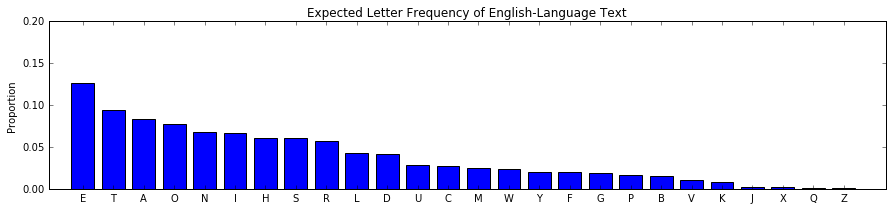

In [22]:
# Get standard English frequencies, sorted by order of frequency.
english_dict = {'A':0.0834,'B':0.0154,'C':0.0273,'D':0.0414,'E':0.126,'F':0.0203,'G':0.0192,'H':0.0611,'I':0.0671,'J':0.0023,'K':0.0087,
                'L':0.0424,'M':0.0253,'N':0.068,'O':0.077,'P':0.0166,'Q':0.0009,'R':0.0568,'S':0.0611,'T':0.0937,'U':0.0285,'V':0.0106,
                'W':0.0234,'X':0.002,'Y':0.0204,'Z':0.0006}
letters, freqs = dict2sort(english_dict)
plot_freq(letters, freqs, title='Expected Letter Frequency of English-Language Text')

Consider the following encoded text.  If we simply analyze the relative frequency of each letter, we will find that we can make informed guesses about the letters in the hopes of cracking the text.

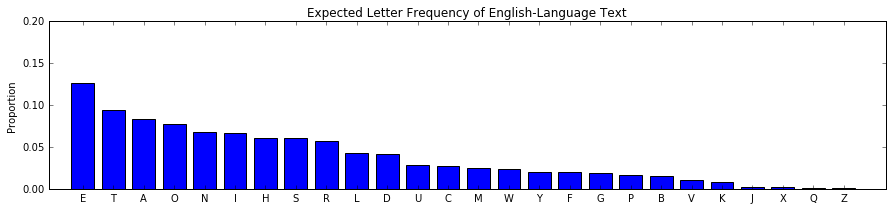

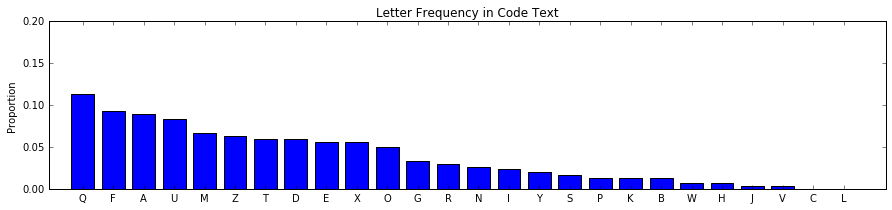

In [23]:
code = """FTQ MOFGMX EOUQZOQ AR XASUO UE OAZHQDEMZF MF BDQEQZF AZXK IUFT FTUZSE QUFTQD OQDFMUZ, UYBAEEUNXQ, AD QZFUDQXK PAGNFRGX---ZAZQ AR ITUOT (RADFGZMFQXK) IQ TMHQ FA DQMEAZ AZ.  FTQDQRADQ FTQ FDGQ XASUO RAD FTUE IADXP UE FTQ OMXOGXGE AR BDANMNUXUFUQE, ITUOT FMWQE MOOAGZF AR FTQ YMSZUFGPQ AR FTQ BDANMNUXUFK ITUOT UE, AD AGSTF FA NQ, UZ M DQMEAZMNXQ YMZ'E YUZP.  (VMYQE OXQDW YMJIQXX)"""

code_dict = calc_freq(code)
code_letters, code_freqs = dict2sort(code_dict)
plot_freq(letters, freqs, title='Expected Letter Frequency of English-Language Text')
plot_freq(code_letters, code_freqs, title='Letter Frequency in Code Text')

Of course, the correspondence isn't perfect, but we can make some reasonable guesses from this comparison.  Let's try just swapping things one-to-one across (that is, replace `'Q'` with `'e'`, `'F'` with `'t'`, etc.).  (The lower-case letters help us avoid collisions.)

In [24]:
guess = code

for c,d in zip(code_letters, letters):
    print(c,'->',d)
    guess = guess.replace(c, d.lower())
print(guess)

Q -> E
F -> T
A -> A
U -> O
M -> N
Z -> I
T -> H
D -> S
E -> R
X -> L
O -> D
G -> U
R -> C
N -> M
I -> W
Y -> Y
S -> F
P -> G
K -> P
B -> B
W -> V
H -> K
J -> J
V -> X
C -> Q
L -> Z
the ndtunl rdoeide ac lafod or daikesrnit nt bsereit ailp woth thoifr eothes destnoi, oybarromle, as eitoselp gaumtcul---iaie ac whodh (castuintelp) we hnke ta senrai ai.  thesecase the tsue lafod cas thor waslg or the dnldulur ac bsamnmolotoer, whodh tnver nddauit ac the ynfiotuge ac the bsamnmolotp whodh or, as aufht ta me, oi n senrainmle yni'r yoig.  (xnyer dlesv ynjwell)


While this still looks like gibberish, note that the first word, in particular, is both a word and makes sense in context.  We can hypothesize that `'F'`→`'T'`, `'T'`→`'H'`, and `'Q'`→`'E'`, at least, are good guesses.

This is a process that a real decoder could use when faced with a substitution cipher like those we've created above.  What about the rest of the letters?  Well, I notice that the second sentence starts with `'thesecase'`, which isn't a word, but `'therefore'` is.  So let's try `'D'`→`'R'`, `'R'`→`'F'`, and `'A'`→`'O'` as well:

In [25]:
guess = code

decode_pairs = [('F','T'), ('T','H'), ('Q','E'), ('D','R'), ('R','F'), ('A','O')]

for c,d in decode_pairs:
    print(c,'->',d)
    guess = guess.replace(c, d.lower())
print(guess)

F -> T
T -> H
Q -> E
D -> R
R -> F
A -> O
the MOtGMX EOUeZOe of XoSUO UE OoZHerEMZt Mt BreEeZt oZXK IUth thUZSE eUther OertMUZ, UYBoEEUNXe, or eZtUreXK PoGNtfGX---ZoZe of IhUOh (fortGZMteXK) Ie hMHe to reMEoZ oZ.  therefore the trGe XoSUO for thUE IorXP UE the OMXOGXGE of BroNMNUXUtUeE, IhUOh tMWeE MOOoGZt of the YMSZUtGPe of the BroNMNUXUtK IhUOh UE, or oGSht to Ne, UZ M reMEoZMNXe YMZ'E YUZP.  (VMYeE OXerW YMJIeXX)


Progress?  If you have the word `'trGe'`, then what is `'G'` likely to be?  What about `'eUther'` for `'U'`?  We already know how to get `'of'`, so what is `'oZ'` for `'Z'`?

In [26]:
guess = code

decode_pairs = [('F','T'), ('T','H'), ('Q','E'), ('D','R'), ('R','F'), ('A','O'), ('G','U'), ('U','I'), ('Z','N')]

for c,d in decode_pairs:
    print(c,'->',d)
    guess = guess.replace(c, d.lower())
print(guess)

F -> T
T -> H
Q -> E
D -> R
R -> F
A -> O
G -> U
U -> I
Z -> N
the MOtuMX EOienOe of XoSiO iE OonHerEMnt Mt BreEent onXK Iith thinSE either OertMin, iYBoEEiNXe, or entireXK PouNtfuX---none of IhiOh (fortunMteXK) Ie hMHe to reMEon on.  therefore the true XoSiO for thiE IorXP iE the OMXOuXuE of BroNMNiXitieE, IhiOh tMWeE MOOount of the YMSnituPe of the BroNMNiXitK IhiOh iE, or ouSht to Ne, in M reMEonMNXe YMn'E YinP.  (VMYeE OXerW YMJIeXX)


Okay, now you just have to see `'EOienOe'` as `'science'`, `'ouSht'` for `'ought'`, and `'fortunMteXK'` for `'fortunately`'.

In [27]:
guess = code

decode_pairs = [('F','T'), ('T','H'), ('Q','E'), ('D','R'), ('R','F'), ('A','O'), ('G','U'), ('U','I'), ('Z','N'), ('E','S'), ('O','C'),
                ('S','G'), ('M','A'), ('X','L'), ('K','Y')]

for c,d in decode_pairs:
    print(c,'->',d)
    guess = guess.replace(c, d.lower())
print(guess)

F -> T
T -> H
Q -> E
D -> R
R -> F
A -> O
G -> U
U -> I
Z -> N
E -> S
O -> C
S -> G
M -> A
X -> L
K -> Y
the actual science of logic is conHersant at Bresent only Iith things either certain, iYBossiNle, or entirely PouNtful---none of Ihich (fortunately) Ie haHe to reason on.  therefore the true logic for this IorlP is the calculus of BroNaNilities, Ihich taWes account of the YagnituPe of the BroNaNility Ihich is, or ought to Ne, in a reasonaNle Yan's YinP.  (VaYes clerW YaJIell)


The final answer can be achieved by either filling out the rest of this dictionary, or by noticing that this is a Caesar cipher from one alphabet to another offset alphabet, with no scrambling or randomization taking place.

In [28]:
print("""The actual science of logic is conversant at present only with things either certain, impossible, or entirely doubtful---
none of which (fortunately) we have to reason on.  Therefore the true logic for this world is the calculus of Probabilities, which
takes account of the magnitude of the probability which is, or ought to be, in a reasonable man's mind.  (James Clerk Maxwell)""")

The actual science of logic is conversant at present only with things either certain, impossible, or entirely doubtful---
none of which (fortunately) we have to reason on.  Therefore the true logic for this world is the calculus of Probabilities, which
takes account of the magnitude of the probability which is, or ought to be, in a reasonable man's mind.  (James Clerk Maxwell)


-   What is the offset you need to provide in order to *decode* the string properly user `caesar_cipher`?

In [29]:
ans = 14 # your answer here

In [30]:
caesar_cipher(code, ans).lower()

"the actual science of logic is conversant at present only with things either certain, impossible, or entirely doubtful---none of which (fortunately) we have to reason on.  therefore the true logic for this world is the calculus of probabilities, which takes account of the magnitude of the probability which is, or ought to be, in a reasonable man's mind.  (james clerk maxwell)"

Let's plot these sorted by letter frequency to clarify things:

### Rotor Cipher Machines

A straightforward extension of the basic substitution cipher (what we've referred to as the Caesar cipher) is the *polyalphabetic cipher*, in which each letter pressed on a mechanical keyboard would both be encoded and trigger a rotor to change position.  Since the rotor determines the alphabet (either the offset or a randomized substitution pattern), each letter press *changes the subsequent encoding alphabet*.  It's rather like changing the offset according to some rule every time you encoded a letter above.

To clarify this, first think of a pair of rotors, or wheels.  The inner (red) wheel represents the base alphabet (of the message), and the outer (blue) wheel represents the letter each inner letter maps to (the encoding).  An offset of one produces the following diagram:

![](./img/rotor-base.png)

A rotor cipher simply chains multiple wheels together, so that a change in one wheel produces an encoded letter *but also changes the position of the encoding rotor* for the next letter.  For instance, before encoding the letter `'A'` from the inner wheel, the rotor configuration is at left.  After encoding `'A'` (to `'B'`), the wheel advances and gives us the *new* configuration at right, in which `'A'` now maps to `'C'`.

![](./img/rotor-pair.png)

In order to think about a rotor cipher, you will have to accept a message, and for each letter in that message you will need to:

1.  Encode the letter.
2.  Advance the offset of the rotor by 1.

-   Compose a function `rotor_cipher` which accepts a string `message` and an integer `n`, the starting offset for the cipher.  `rotor_cipher` should `return` the message transformed by successively apply the rotor cipher across the alphabet.

In [31]:
# define your function here
def rotor_cipher(message, n):
    encoded = ''
    
    # Convert the message to upper-case.
    message = message.upper()
    
    # Loop over each letter of the message.
        # If the letter is in the alphabet, then:
            # 1. encode the letter; remember to re-use function defined before
            # 2. advance the offset by 1 (modulo 26)
        # Otherwise, just add the whitespace or punctuation or numeric character to the encoded string.
    for c in message:
        if c in alphabet:
            encoded += mapper(c, n)
            n += 1            
        else:
            encoded += c
    
    # Finally, return the encoded message.
    return encoded

In [32]:
# test your code here.  You may edit this cell, and you may use any sample text, but the following is provided for convenience.
# As an example, 'HELLO' maps to 'HFNOS' if it starts with an offset of 0:  H->H, E->F (1), L->N (2), L->O (3), O->S (4).
text = 'HELLO'
rotor_cipher(text,0)

'HFNOS'

In [33]:
# it should pass this test---do NOT edit this cell
test_text = """The observer who has thoroughly understood one link in a series of incidents should be able to accurately state all the other
ones, both before and after."""
code_text = """TIG RFXKYDNB HTB VPI KZHLJQDFKY VPGIWYAWXN ZZR ZXDB AG U NAOGDS PH LRHOKMWDD EUCJBU TX UWHB RN ADEXVFZLTH CEMGS PBC LAY JPECQ
OOGV, FTZO JNPZDR OCT RXMYM."""
result_text = rotor_cipher(test_text,0)
assert result_text == code_text
print('Success!')

Success!


In [34]:
# it should pass this test---do NOT edit this cell
test_text = """You observed that her right glove was torn at the forefinger, but you did not apparently see that both glove and finger were
stained with violet ink. She had written in a hurry and dipped her pen too deep."""
code_text = """YPW RFXKYDNN ETNH WUI JBACP DJNVF YDW YUYV JD ETR TDHVXBHBAO, ZTT ZQX HNJ UWC KABNFTDKDR MZA QFZT CQWL LRVDN KYP SWCWVJ PYMA
PRZIOGG ANZO DRYWQG WCA. JZX BVZ TPHTUGQ MS G OCABJ MAR SYGHXX CAO NDN UQR HJKW."""
result_text = rotor_cipher(test_text,0)
assert result_text == code_text
print('Success!')

Success!


Congratulations, This is all for today's lab session!

But next, we have a small bonus that you'll get extra-credit if you can finish.

### Bonus: two-rotor cipher

While encoding strings with a single rotor provides *some* security, it's actually easy enough to break this code with a computer since the key is only 26 characters long.  (And, in this case, in alphabetical order.)

So the next logical improvement is to randomize the order of the letters in the alphabet.  We'll skip that improvement in favor of the next:  adding a second rotor.

When this happens, the *first* rotor proceeds as we have seen before.  When it makes a complete cycle (26 characters have been encoded), then it trips the *second* rotor forward one.

That is, for offsets `1,1`, originally `'A'` maps to the first rotor at `'B'` and then to the second rotor at `'C'` for a net transformation of `'A'` to `'C'`.

![](./img/two-rotors1.png)

After encoding `'A'`, the offsets are `(2,1)`:  the first rotor advances by offset 2 and the second rotor advances relatively by offset 1 from the first rotor) such that `'A'` maps to the first rotor at `'C'` and then to the second rotor at `'D'` for a net transformation of `'A'` to `'D'`.

![](./img/two-rotors2.png)

Once things cycle back around though (the 26 characters), the offsets are `(0,2)`: The first rotor's offset is reset back to 0, and the second rotor's offset advances from 1 to 2. So now `'A'` maps to the first rotor at `'A'` and then to the second rotor at `'C'` for a net transformation of `'A'` to `'C'`.

![](./img/two-rotors3.png)

With two rotors then, the key repeats every $26 \times 26 = 676$ characters.

-   Compose a function `two_rotors` which accepts a string `message` and two integers `m` and `n`, the offsets of the first and second rotors, respectively.  `two_rotors` should `return` the `message` transformed by the two-rotor cipher method as detailed above.

In [35]:
# define your function here
def two_rotors(message, m, n):
    encoded = ''
    # Convert the message to upper-case.
    
    message = message.upper()
    # Loop over each letter of the message.
        # If the letter is in the alphabet, then:
            # 1. encode the letter with two rotors
            # 2. advance the offset of the first rotor by 1 (modulo 26)
                # if the offset is now zero (one full cycle of rotor 1), then advance rotor 2 (modulo 26)
            # you may find it convenient to `print` the offsets, the letter, and the encoding to clarify things here
        # Otherwise, just add the whitespace or punctuation or numeric character to the encoded string.
    for c in message:
        if c in alphabet:
            encoded += mapper(mapper(c, m),n)
            m = (m+1)%26
            if m == 0:
                n = (n+1)%26
        else:
            encoded += c
        
    
    # Finally, return the encoded message.
    return encoded

In [36]:
# test your code here.  You may edit this cell, and you may use any sample value, but the following is provided for convenience.
text = """Mr. Fowler being a persevering man, as a good seaman should be, blockaded the house, and having met you succeeded by certain
arguments, metallic or otherwise, in convincing you that your interests were the same as his."""
two_rotors(text,1,1)

'OU. JTCSMA LPUAU P FVJLYQAOGMG ODR, FY H OXYO EROBQE KAIPHA ZD, BMRGPGKMM DSQ UCJIV, SGX CWSGMG NGX DUB ADMNQRRTT SQ VYMPXGM\nASIXRKUBB, WPFNZAYT GK IODBPVITG, LR IVVESYOVBV OFM MBVP VMTR JPWIWLACC HQES IXV KTGZ WP FHS.'

In [37]:
# it should pass this test---do NOT edit this cell
test_text = """Mr. Fowler being a persevering man, as a good seaman should be, blockaded the house, and having met you succeeded by certain
arguments, metallic or otherwise, in convincing you that your interests were the same as his."""
code_text = """OU. JTCSMA LPUAU P FVJLYQAOGMG ODR, FY H OXYO EROBQE KAIPHA ZD, BMRGPGKMM DSQ UCJIV, SGX CWSGMG NGX DUB ADMNQRRTT SQ VYMPXGM
ASIXRKUBB, WPFNZAYT GK IODBPVITG, LR IVVESYOVBV OFM MBVP VMTR JPWIWLACC HQES IXV KTGZ WP FHS."""
result_text = two_rotors(test_text,1,1)
assert result_text == code_text
print('Success!')

Success!


### Encoding Security

We expect this approach to be far more robust against letter frequency attacks.  Let's briefly compare the frequency of the letters in an encoded block of text:

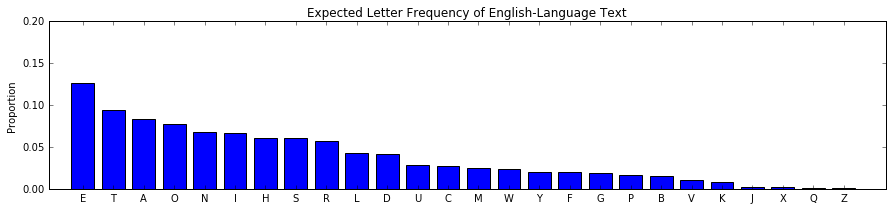

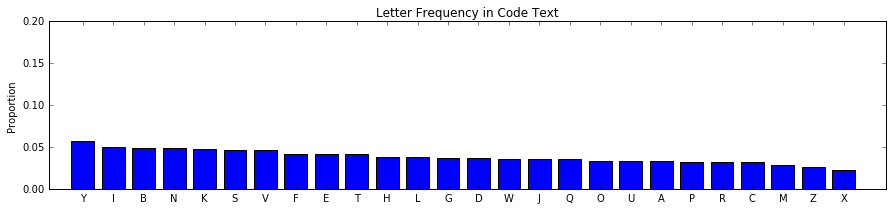

In [38]:
code = """'LAY “XKJNTTBDOI” SATJNBD YON RV VXMXNFZDD CTLIKRF IB DSQ ETQC FNGWAOQ VHPUH ICVYMBCTAAG QJ S WYXEJYK ASG FEQIBTJLWQ OM
UZFBNZ IBYMS. BNWLTANP CRP EHPYUUM IA PEGR PBRHV NY VACOYEVPAO KAY XKJNTTBDOI SATJNBD, UG WH QCEINP BOTAMNB IFYF BX NPRVBT QEV
BIRBQSIHCWI HUTXDDLNYS UKEUMCKKQ NF BP LRYKNZJV GMEWPRCW HL V OCZL PT FSRVBBJLWQ IOGYRTEY, XKKOUUCEPJ VYMMSNMGSH, QEV LI AKOSH.
UJH JZTKIVOYFNZ EHFTEYHO FLVPNYII GYM, QYHQISG, JYW LUHA FL DBEK GFYL, IWN T TNJT SYGLYI PEC BOOSYYGITN XFYOSGI WGK YSLIGBIU
WVJGAUNXE MF WCLFDOCIC QFD LFCWY IBUKBZGF HTSYFBKPA. F FNPF UKTXATH DZ SVJT QE SVWJQKR NF UJH VKSICSZZF CU JYW VIHLRRZBMG QYRIMAC,
QGAQIYFFL, UIZ PM EOSVK XT UVN KYAGVTH. KZBM REIJ HNDNXHJ G KNFPXBDBUEL HZ ODB RGEPTB SK LBVMEUBBH EW S KYVH SYQIBDOI JDWZNDERR XD
KWKGN KC ANMQWWEGRL VDWNRFH. QTUHLYEKE SO NA GIKOUQCSZA, O CKDTXL DO ZMLPVVDFQK PN RDD PSRYDSE WVJ YC VRJVWIS JVEW LJ M ZPSYAGY.
(VHXL SUSKQK, 1937)\n'"""

code_dict = calc_freq(code)
code_letters, code_freqs = dict2sort(code_dict)
plot_freq(letters, freqs, title='Expected Letter Frequency of English-Language Text')
plot_freq(code_letters, code_freqs, title='Letter Frequency in Code Text')

The occurrence of each letter is nearly uniform, leaving us no way to attempt to break this code by a frequency analysis!  Higher-order patterns must be identified and analyzed, which is precisely what the British Ultra project did before and during World War II.

The [Nazi Enigma machine](https://en.wikipedia.org/wiki/Enigma_machine) was used extensively to send top-secret military communications to troops and operatives in the field.  Enigma had either three or four rotors and several other mapping devices within it, which effected a fiendishly complex mathematical transformation closely related to what you've done above.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Enigma_rotor_set.png/440px-Enigma_rotor_set.png)

Famously, the code was cracked for the first time in 1939 by British mathematicians, including Alan Turing, one of the fathers of computer science.  The British kept this codebreaking secret and successfully used it to counter Nazi assaults during the war.  (A similar process took place against the [Imperial Japanese PURPLE machine](https://en.wikipedia.org/wiki/Purple_(cipher_machine)) by the American government.)

Cryptography has grown vastly more sophisticated from these early efforts, but it is still rooted in the idea of a set of transformations applied either to letters directly or to the binary representations those characters have on the machine.

In [39]:
def two_rotors_decode(message, m, n):
    encoded = ''
    message = message.upper()
    
    for letter in message:
        if letter in alphabet:
            encoded += mapper(letter,n+m)
            n = (n-1)%26  # the only differences to decode
            if n%26 == 0:
                m = (m-1)%26  # here as well
        else:
            encoded += letter
    
    # Finally, return the result.
    return encoded

print(two_rotors_decode(code,13,21).lower())

'the “computable” numbers may be described briefly as the real numbers whose expressions as a decimal are calculable by
finite means. although the subject of this paper is ostensibly the computable numbers, it is almost equally easy to define and
investigate computable functions of an integral variable or a real or computable variable, computable predicates, and so forth.
the fundamental problems involved are, however, the same in each case, and i have chosen the computable numbers for explicit
treatment as involving the least cumbrous technique. i hope shortly to give an account of the relations of the computable numbers,
functions, and so forth to one another. this will include a development of the theory of functions of a real variable expressed in
terms of computable numbers. according to my definition, a number is computable if its decimal can be written down by a machine.
(alan turing, 1937)
'
